# Regresión Lineal

En este notbook exploraremos la regresión lineal univariable y multivariable utilizando el dataset de la obesidad del UCI repositorio de datos, el link para el datasert lo pueden encontrar en el siguiente [link](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+).

Primero empecemos cargando las librerias necesarias para nuestro ejercicio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Ahora carguemos los archivos y exploremos un poco los datos que tenemos

In [2]:
# Cargando el archivo de excel con los datos
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data.shape

(2111, 17)

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Para este ejercicio simplemente vamos a explorar las ideas básicas vistas en la parte teórica**, debido a esto no vamos a considerar los elementos de regularización o normalización de datos, los cuales normalmente deben ser incluidos en un problema de regresión. Tampoco se tendrá en cuenta procedimientos utilizados para evaluar el modelo lineal tales como validación cruzada, entre otras. Así que solamente nos enfocaremos en como se plantea el problema y que tipo de soluciones podemos obtener utiliznado para predecir datos de entrenamiento. Cabe resaltar que este procedimiento es simplemente demostrativo y en ningún momento indica que este es el procedimiento a seguir cuando se realiza un modelo de regresión.

## Regresion Lineal Univariable

Para este ejemplo encontraremos una regresión lineal utilizando como variable independiente la altura y como variable dependiente el peso. Lo primero que haremos es extraer los datos y graficarlos para analizar que relación puede existir entre estas dos variables:

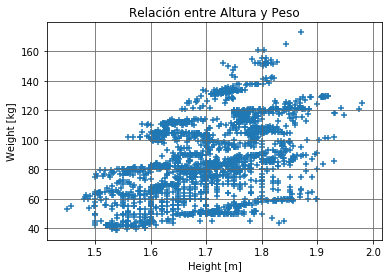

In [4]:
x1 = data['Height']
y = data['Weight']

# Graficando las variables de interes
plt.scatter(x1, y,marker='+')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.title('Relación entre Altura y Peso')
# Activando el grid del plot
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.show()

En este caso vamos a implementar la regresión utilizando el étodo matricial. Se pueden utilizar también funciones que tiene python que realizan este tipo de regresión. Para esto se puede usar el módulo de regresion lineal de la libreria de Scikit-Learn de python (**sklearn.linear_model**). Este módulo implementa la regresión lineal utilizando el algoritmo de gradiente descendiente estocastico. Para nuestro ejemplo empezaremos formando la matriz de regresores y estimando lso parámetros $\boldsymbol\theta$ de la regresión.

In [5]:
# Construyendo nuestra matriz de regresores
ones = np.ones((len(data),1))
X = np.column_stack((ones,x1))

In [6]:
theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X.T,X)),X.T),y)
theta

array([-134.64022287,  130.0048335 ])

Aquí podemos ver que nuestro modelo esta dado por la ecuación:

$$\text{Peso} = -134.64+130.004*\text{Altura}$$

Ahora observemos que tal se ajusta este modelo a lso datos observados:

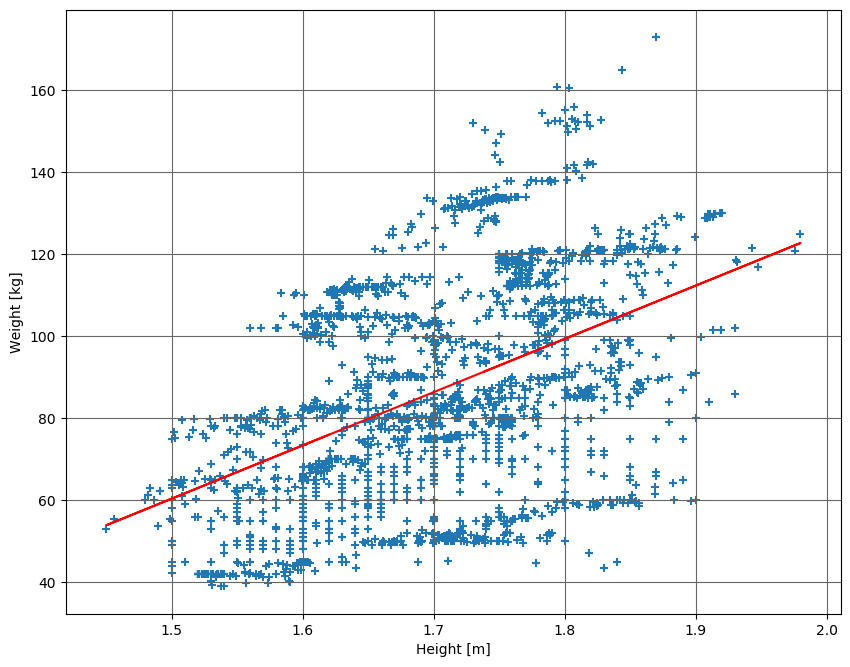

In [7]:

# Realizando la predicción del peso dada la matriz de entrada
y_predict = np.matmul(X,theta)

# Graficando las variables de interes
plt.scatter(x1, y, marker='+')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.plot(x1, y_predict, color='r')

# Activando el grid del plot
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.show()

Ahora vamos a examinar cual es el intervalo de confianza para la regresión lineal utilizando bootstraping. Para este caso realizaremos el procedmiento 10000 veces, y cada vez extreaeremos 100 datos para realizar la regresión. Una vez tengamos estos valores, estimaremos el peso utilizando siempre la misma matrix de regresores, esto facilita la comparación entre estimaciones del modelo para diferentes valroes de parámetros.

In [8]:
nrow = len(x1)
n = 10000

theta_confidence= []
y_confidence = []
index_s = np.argsort(x1)
X_s = X[index_s,:]

for i in range(n):
    np.random.seed(i)
    indx = np.random.randint(0,nrow, size=100)
    Xt_train = X[indx,:]
    yt_train = y[indx]
    
    theta_est = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Xt_train.T,Xt_train)),Xt_train.T),yt_train)
    y_est = np.matmul(X_s,theta_est)
    
    theta_confidence.append(theta_est)
    y_confidence.append(y_est)
    

Ahora vamos a proceder a calcular los percentiles 2.5 y 97.5 de nuestra regresión para poder estimar lso intervalos de confidencia, y los vamos a gráficar para observar cual es el rango de variación en nuestra estimación, dados los datos observados entre peso y altura.

In [9]:
np.percentile(theta_confidence,50,axis=0)

array([-134.27872129,  129.78121255])

In [10]:
np.percentile(theta_confidence,97.5,axis=0)

array([-56.31820666, 175.71346799])

In [11]:
np.percentile(theta_confidence,2.5,axis=0)

array([-211.32264641,   83.75011949])

In [12]:
y_lower = np.percentile(y_confidence,97.5,axis=0)
y_higher = np.percentile(y_confidence,2.5,axis=0)
y_median = np.percentile(y_confidence,50,axis=0)

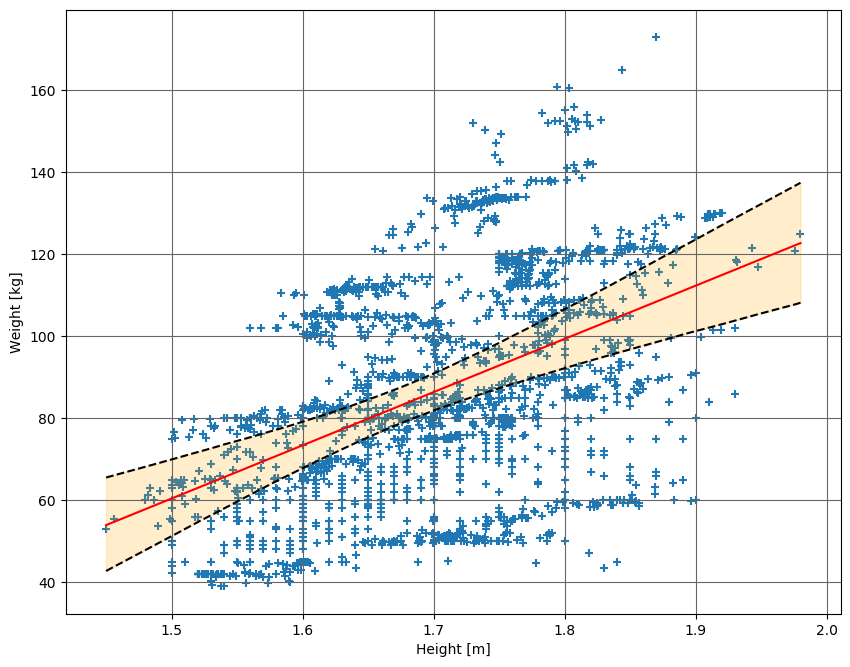

In [15]:
# Graficando las variables de interes
plt.scatter(x1, y, marker='+')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')

x1_s = x1[index_s]
 
plt.plot(x1_s, np.matmul(X_s,np.mean(theta_confidence,0)), 'r')
plt.plot(x1_s, y_lower,'k--')
plt.plot(x1_s, y_higher,'k--')

plt.fill_between(x1_s, y_lower, y_higher,
                 facecolor="blue", # The fill color
                 color='orange',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Activando el grid del plot
plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.show()


## Regresión Multivariable

Ahora agregemos una nueva variable a nuestro problema de regresión, en este caso incluyamos la edad como variable independiente. Asií nuestro modelo busca estimar el peso de una persona segun su edad y su altura. Procedmoes a crear nuestra matriz de regresores, de la misma forma como se creo la matriz en el caso univariable. Luego procedemos a encontrar los valores de los parámetros.

In [16]:
x2 = data['Age']
Xm = np.column_stack((ones,x1,x2))

In [17]:
theta_m = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Xm.T,Xm)),Xm.T),y)
theta_m

array([-158.84912613,  131.56946065,    0.88622413])

Aquí podemos ver que nuestro modelo esta dado por la ecuación:

$$\text{Peso} = -158.84+131.56*\text{Altura}+0.88*\text{Edad}.$$

Ahora procedamos a predecir la salida de nuestro modelo.

In [18]:
ym_predict = np.matmul(Xm,theta_m)

En este caso, al ser un modelo multivariable es dificil poder tener una idea grafica del comportamiento del modelo y de sus intervalos de confidencia. La variación de los parámetros en función de los datos observados se puede calcular  utiliznado bootstraping como en el caso anterior. Sin emabrgo, si queremos evaluar que tan bien se comporta el modelo umultivariado vs el modelo univariado tenemos que utilizar otro tipo de métricas. En estos casos podemos evaluar la magnitud de los residuales, su distribución etc. 

Otra forma qu ese puede utilizar para evaluar que tan bueno son estos modelos es realizar una gráfica de variablepredecida vs variable observada. En un caso ideal se tiene que $y_{pred} = y_{est}$, es decir una linea recta con pendiente uno. Sin emabrgo, debido al ruido en las observaciones, o a la baja complejidad de modelos utilizados, los datos en esta grafica estaran dispersos al rededor de la linea $y_{pred} = y_{est}$. Entre menor sea la disperción de los datos alrededor de esta linea mejor es el modelo. Ahora observemos que tal se comporta el modelo univariable con el modelo multivariable, utiliznado este método.

[Text(0, 0.5, 'salida real'),
 Text(0.5, 0, 'salida estimada'),
 Text(0.5, 1.0, 'Modelo Multivariable')]

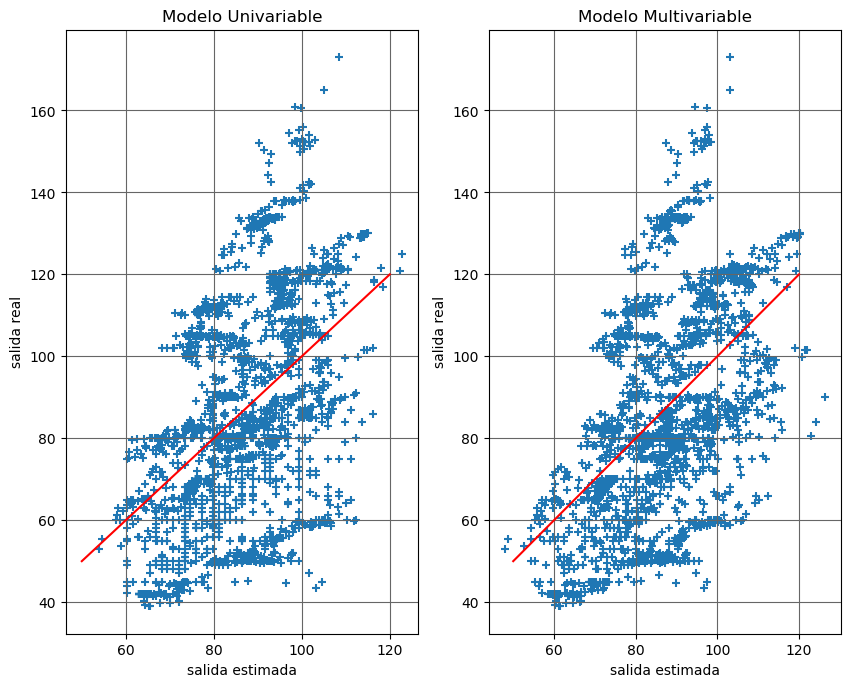

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(y_predict, y, marker='+')
ax1.grid(b=True, which='major', color='#666666', linestyle='-')
ax1.plot([50,120],[50,120],'r-')
ax1.set(xlabel='salida estimada', ylabel='salida real',title='Modelo Univariable')

ax2.scatter(ym_predict, y, marker='+')
ax2.grid(b=True, which='major', color='#666666', linestyle='-')
ax2.plot([50,120],[50,120],'r-')
ax2.set(xlabel='salida estimada', ylabel='salida real',title='Modelo Multivariable')
